In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('voice.csv')

In [5]:
data.head(7)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male


In [6]:
data.label = [1 if each =="female" else 0 for each in data.label]
data.label.values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [7]:
y = data.label.values
x_data = data.drop(['label'], axis = 1)

In [8]:
#normalization
#(x-min(x))/(max(x)-min(x))
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [9]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
#find transpose
x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (20, 2534)
x_test shape: (20, 634)
y_train shape: (2534,)
y_test shape: (634,)


In [20]:
#parameter initialize and sigmoid function
#dimention=30
def initialize_weights(dimension):
    w = np.full((dimension,1),0.01)
    return w
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#sigmoid(0)

In [21]:
#forward propagation
def forward_backward_propagation(w, x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train)
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight}
    
    return cost, gradients

In [22]:
# Updating(learning) parameters
def update(w, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w ,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [23]:
# prediction
def predict(w, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test))
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [24]:
#logistic_regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w = initialize_weights(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"], x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.692360
Cost after iteration 10: 0.570866
Cost after iteration 20: 0.511081
Cost after iteration 30: 0.472201
Cost after iteration 40: 0.442616
Cost after iteration 50: 0.418268
Cost after iteration 60: 0.397421
Cost after iteration 70: 0.379181
Cost after iteration 80: 0.363012
Cost after iteration 90: 0.348552
Cost after iteration 100: 0.335534
Cost after iteration 110: 0.323748
Cost after iteration 120: 0.313029
Cost after iteration 130: 0.303237
Cost after iteration 140: 0.294259
Cost after iteration 150: 0.285998
Cost after iteration 160: 0.278372
Cost after iteration 170: 0.271310
Cost after iteration 180: 0.264753
Cost after iteration 190: 0.258649
Cost after iteration 200: 0.252952
Cost after iteration 210: 0.247624
Cost after iteration 220: 0.242630
Cost after iteration 230: 0.237939
Cost after iteration 240: 0.233525
Cost after iteration 250: 0.229364
Cost after iteration 260: 0.225435
Cost after iteration 270: 0.221720
Cost after iteration 280: 0.218

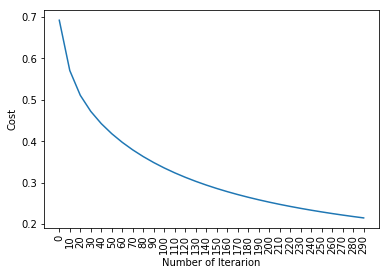

test accuracy: 97.1608832807571 %


In [25]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300)

Cost after iteration 0: 0.692360
Cost after iteration 10: 1.075812
Cost after iteration 20: 0.674687
Cost after iteration 30: 0.471326
Cost after iteration 40: 0.377696
Cost after iteration 50: 0.304993
Cost after iteration 60: 0.256866
Cost after iteration 70: 0.234435
Cost after iteration 80: 0.221910
Cost after iteration 90: 0.211874
Cost after iteration 100: 0.203261
Cost after iteration 110: 0.195774
Cost after iteration 120: 0.189207
Cost after iteration 130: 0.183402
Cost after iteration 140: 0.178235
Cost after iteration 150: 0.173606
Cost after iteration 160: 0.169438
Cost after iteration 170: 0.165664
Cost after iteration 180: 0.162233
Cost after iteration 190: 0.159098


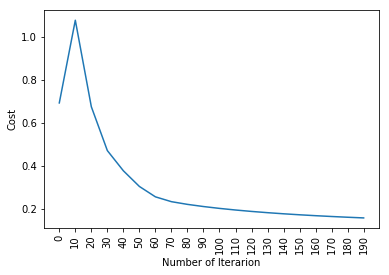

test accuracy: 97.79179810725552 %


In [26]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 3, num_iterations = 200)

Cost after iteration 0: 0.692360
Cost after iteration 10: 0.510379
Cost after iteration 20: 0.442952
Cost after iteration 30: 0.396954
Cost after iteration 40: 0.362530
Cost after iteration 50: 0.335093
Cost after iteration 60: 0.312625
Cost after iteration 70: 0.293889
Cost after iteration 80: 0.278032
Cost after iteration 90: 0.264440
Cost after iteration 100: 0.252664
Cost after iteration 110: 0.242363
Cost after iteration 120: 0.233277
Cost after iteration 130: 0.225205
Cost after iteration 140: 0.217987
Cost after iteration 150: 0.211495
Cost after iteration 160: 0.205624
Cost after iteration 170: 0.200291
Cost after iteration 180: 0.195425
Cost after iteration 190: 0.190968
Cost after iteration 200: 0.186871
Cost after iteration 210: 0.183091
Cost after iteration 220: 0.179595
Cost after iteration 230: 0.176350
Cost after iteration 240: 0.173332
Cost after iteration 250: 0.170517
Cost after iteration 260: 0.167886
Cost after iteration 270: 0.165421
Cost after iteration 280: 0.163

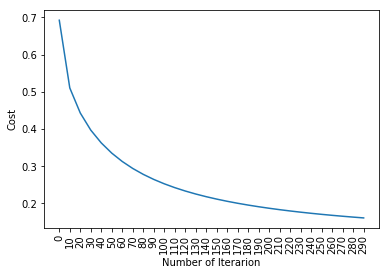

test accuracy: 97.79179810725552 %


In [27]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 2, num_iterations = 300)

In [28]:
print(x_train.shape)
print(y_train.shape)

(20, 2534)
(2534,)


In [30]:
#sklearn with logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy: {} ".format(lr.score(x_test.T,y_test.T)))

Test Accuracy: 0.9810725552050473 
